# Feature Analysis for Scenario B
The goal of this notebook is to go through the features available to us through Scenario B of the ISCXTor2016 dataset. Since there are 5 data files for each scenario, here we will the distributions and plots of features across the data files to show any trends with the timeout values (just like in Scenario A).

## To - Do:
 - [ ] Compare the feature graphs across timeout values
 - [ ] Determine the features that have the clearest distinction between classes
 - [ ] Run Feature Selection algorithms from `sklearn` to determine the most significant features

In [1]:
# Import Seaborn for the graphing
import seaborn as sns
import matplotlib.pyplot as plt

# Data management
import pandas as pd

print('Imports complete.')

Imports complete.


In [2]:
path = '../../tor_dataset/'
scenario = 'Scenario-B/'
files=['TimeBasedFeatures-10s-Layer2.csv',
      'TimeBasedFeatures-15s-Layer2.csv',
      'TimeBasedFeatures-30s-Layer2.csv',
      'TimeBasedFeatures-60s-Layer2.csv',
      'TimeBasedFeatures-120s-Layer2.csv']

dep_var = 'class'

df10, df15, df30, df60, df120 = [pd.read_csv(path + scenario + file) for file in files]

In [3]:
print('df10: \nnum features: {}\n{}'.format(len(df10.columns)-1, df10['class'].value_counts()))
print('\ndf15: \nnum features: {}\n{}'.format(len(df15.columns)-1, df15['class'].value_counts()))
print('\ndf30: \nnum features: {}\n{}'.format(len(df30.columns)-1, df30['class'].value_counts()))
print('\ndf60: \nnum features: {}\n{}'.format(len(df60.columns)-1, df60['class'].value_counts()))
print('\ndf120: \nnum features: {}\n{}'.format(len(df120.columns)-1, df120['class'].value_counts()))

df10: 
num features: 23
VOIP               2291
BROWSING           1604
P2P                1085
VIDEO-STREAMING     874
FILE-TRANSFER       864
AUDIO-STREAMING     721
CHAT                323
EMAIL               282
Name: class, dtype: int64

df15: 
num features: 23
VOIP               1509
VIDEO-STREAMING     598
FILE-TRANSFER       480
CHAT                243
BROWSING            227
EMAIL               186
P2P                  71
AUDIO-STREAMING      46
Name: class, dtype: int64

df30: 
num features: 23
VOIP               758
VIDEO-STREAMING    345
FILE-TRANSFER      246
CHAT               147
BROWSING           133
EMAIL              104
P2P                 38
AUDIO-STREAMING     32
Name: class, dtype: int64

df60: 
num features: 23
VOIP               381
VIDEO-STREAMING    177
FILE-TRANSFER      125
CHAT                84
BROWSING            73
EMAIL               54
AUDIO-STREAMING     22
P2P                 20
Name: class, dtype: int64

df120: 
num features: 23
VOIP               

In [4]:
df10['class'] = df10['class'].map(lambda classif : 'VIDEO-STREAMING' if classif == 'VIDEO' else classif)
df10['class'] = df10['class'].map(lambda classif : 'EMAIL' if classif == 'MAIL' else classif)
df10['class'] = df10['class'].map(lambda classif : 'AUDIO-STREAMING' if classif == 'AUDIO' else classif)

print('df10: \nnum features: {}\n{}'.format(len(df10.columns)-1, df10['class'].value_counts()))

df10: 
num features: 23
VOIP               2291
BROWSING           1604
P2P                1085
VIDEO-STREAMING     874
FILE-TRANSFER       864
AUDIO-STREAMING     721
CHAT                323
EMAIL               282
Name: class, dtype: int64


In [5]:
dictionary = {}

for df in [df15, df30, df60, df120]:
    for feature in df.columns[:-1]:
        if feature in dictionary:
            dictionary[feature] += 1
        else:
            dictionary[feature] = 1

print('Feature\t\tCount')
for feature in dictionary:
    print('{}\t{}'.format(feature, dictionary[feature]))

Feature		Count
duration	4
total_fiat	4
total_biat	4
min_fiat	4
min_biat	4
max_fiat	4
max_biat	4
mean_fiat	4
mean_biat	4
flowPktsPerSecond	4
flowBytesPerSecond	4
min_flowiat	4
max_flowiat	4
mean_flowiat	4
std_flowiat	4
min_active	4
mean_active	4
max_active	4
std_active	4
min_idle	4
mean_idle	4
max_idle	4
std_idle	4


We can notice that, in Scenario B, there are no features that aren't present in every single data file. In Scenario A, we had a couple features that were missing in one data file, replaced with another feature not present in the other data files.  

To compare the features available within this dataset, we will use some functions that I compiled in the Scenario A feature analysis notebook. We can see these functions below...

In [6]:
import numpy as np

def show_scatter_compare(dfs=[], feature='', timeouts=[]):
    nrows = int(np.floor(len(dfs)/2))
    ncols = int(np.ceil(len(dfs)/2))
    fig,axes= plt.subplots(nrows=nrows, ncols=ncols)
    
    # Keep track of which session timeout we are on
    i=0
    
    # Keep track of the axis
    row=0
    col=0

    for df in dfs:
        try:
            axes[col][row].scatter(y=df[feature], x=df[dep_var])
            axes[col][row].set_title('Classification on {} with Timeout={}s'.format(feature, timeouts[i]))
            axes[col][row].set_xlabel('Classification')
            axes[col][row].set_ylabel(feature)
        except:
            print('No feature for {}s'.format(timeouts[i]))
        
        #axes[col][row].tick_params(labelrotation=90)
        labels=['AUDIO-STREAMING', 'BROWSING', 'CHAT', 'EMAIL', 'FILE-TRANSFER', 'P2P', 'VIDEO-STREAMING', 'VOIP']
        axes[col][row].set_xticklabels(labels, rotation=90)
        
        # Move on to the next axis
        row += 1        
        if row+1 > nrows:
            row=0
            col+=1
            
        # Move on to the next timeout label
        i+=1

    plt.subplots_adjust(right=2.0, top=2.0, wspace=0.2, hspace=0.8)

    plt.show()
    
def show_dist_compare(dfs=[], feature='', timeouts=[]):
    nrows = int(np.floor(len(dfs)/2))
    ncols = int(np.ceil(len(dfs)/2))
    fig,axes= plt.subplots(nrows=nrows, ncols=ncols)
    
    # Keep track of which session timeout we are on
    i=0
    
    # Keep track of the axis
    row=0
    col=0

    for df in dfs:
        try:
            dfvoip = df.loc[ df[dep_var] == 'VOIP']
            dfvideo = df.loc[ df[dep_var] == 'VIDEO-STREAMING']
            dfftp = df.loc[ df[dep_var] == 'FILE-TRANSFER']
            dfchat = df.loc[ df[dep_var] == 'CHAT']
            dfbrow = df.loc[ df[dep_var] == 'BROWSING']
            dfemail = df.loc[ df[dep_var] == 'EMAIL']
            dfaudio = df.loc[ df[dep_var] == 'AUDIO-STREAMING']
            dfp2p = df.loc[ df[dep_var] == 'P2P']
            
            axes[col][row].hist(dfvoip[feature], 10, histtype='step', density=True)
            axes[col][row].hist(dfvideo[feature], 10, histtype='step', density=True)
            axes[col][row].hist(dfftp[feature], 10, histtype='step', density=True)
            axes[col][row].hist(dfchat[feature], 10, histtype='step', density=True)
            axes[col][row].hist(dfbrow[feature], 10, histtype='step', density=True)
            axes[col][row].hist(dfemail[feature], 10, histtype='step', density=True)
            axes[col][row].hist(dfaudio[feature], 10, histtype='step', density=True)
            axes[col][row].hist(dfp2p[feature], 10, histtype='step', density=True)
            
            axes[col][row].set_title('Distribution of {} with Timeout={}s'.format(feature, timeouts[i]))
            axes[col][row].set_xlabel('Distribution of {}'.format(feature))
            axes[col][row].set_ylabel('Density')
            
        except:
            print('No feature for {}s'.format(timeouts[i]))
            
        labels=['AUDIO-STREAMING', 'BROWSING', 'CHAT', 'EMAIL', 'FILE-TRANSFER', 'P2P', 'VIDEO-STREAMING', 'VOIP']
        axes[col][row].legend(labels, loc='upper right')
        axes[col][row].ticklabel_format(useOffset=True, style='sci')

        # Move on to the next axis
        row += 1        
        if row+1 > nrows:
            row=0
            col+=1
            
        # Move on to the next timeout label
        i+=1

    plt.subplots_adjust(right=2.0, top=2.0, wspace=0.2, hspace=0.3)
    
    plt.show()

And we can implement these functions as seen below...

Feature: duration


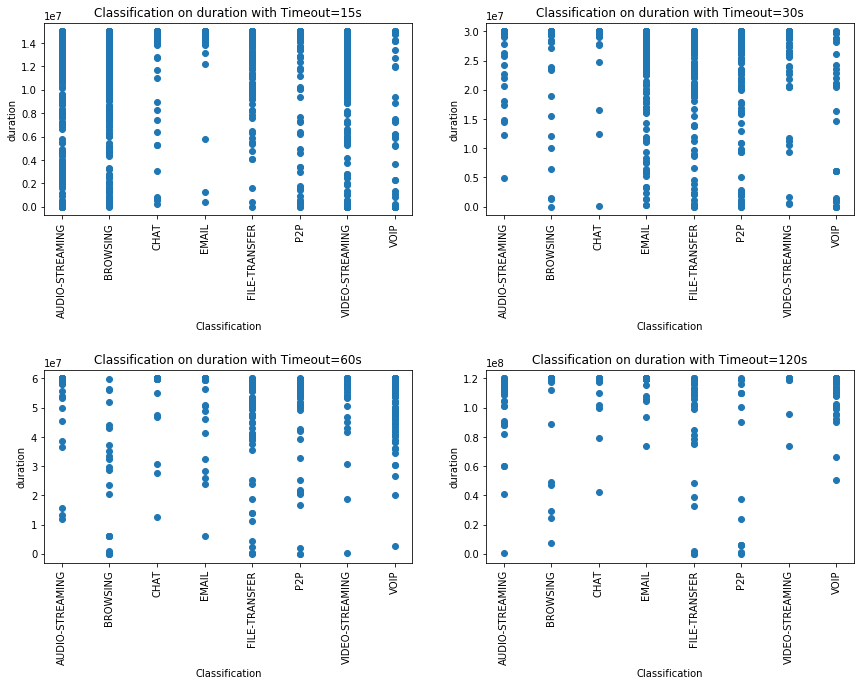

Feature: total_fiat


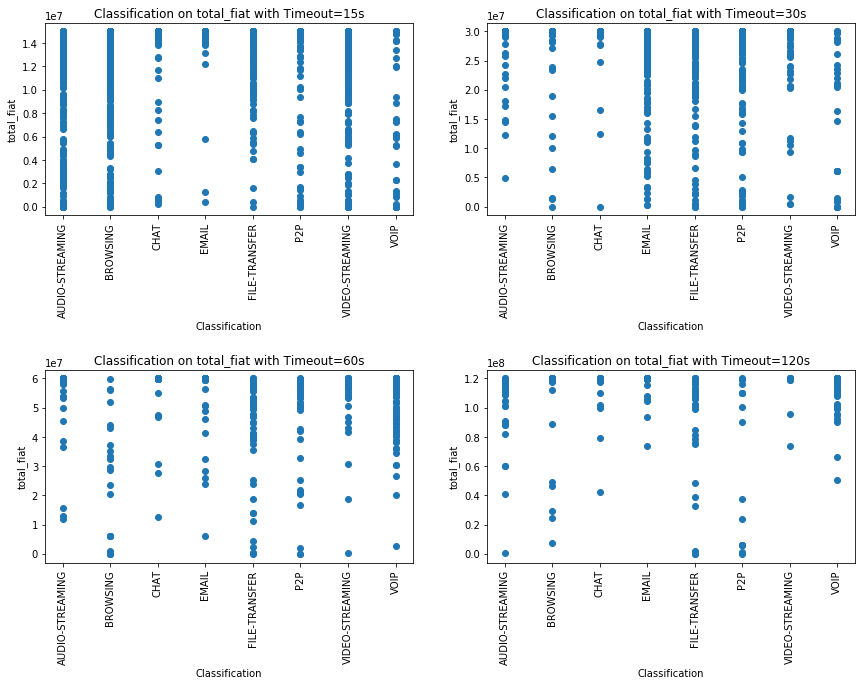

Feature: total_biat


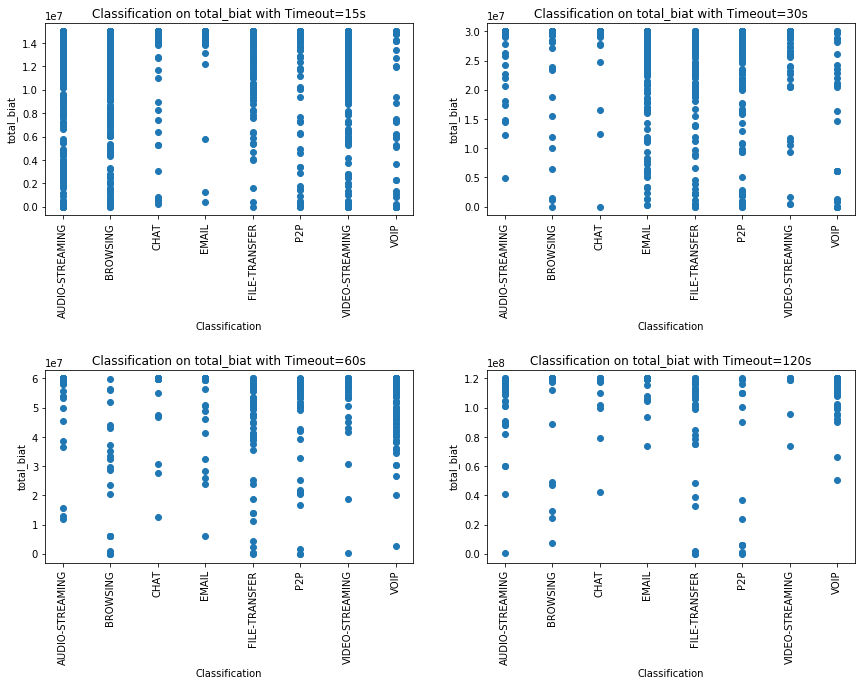

Feature: min_fiat


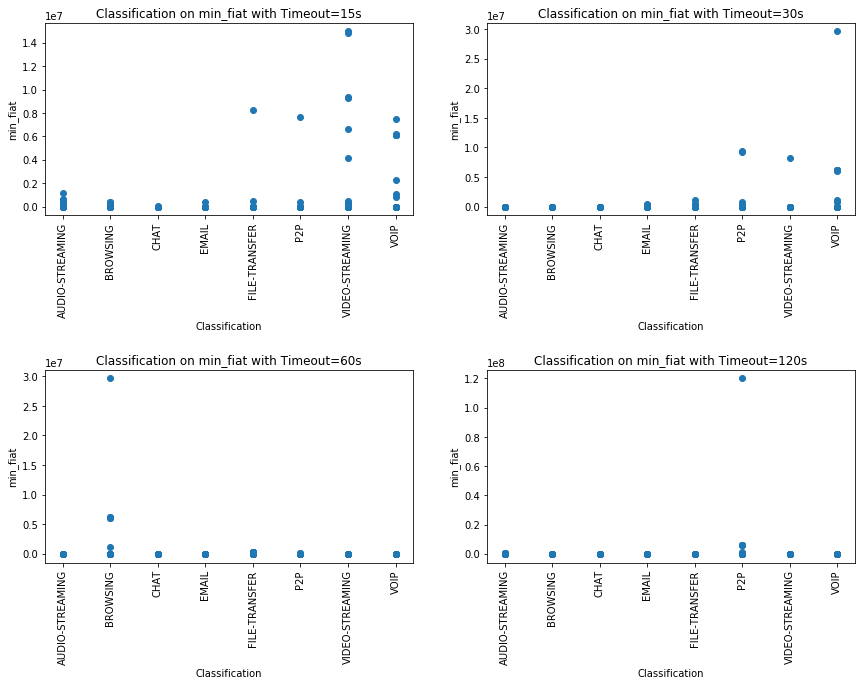

Feature: min_biat


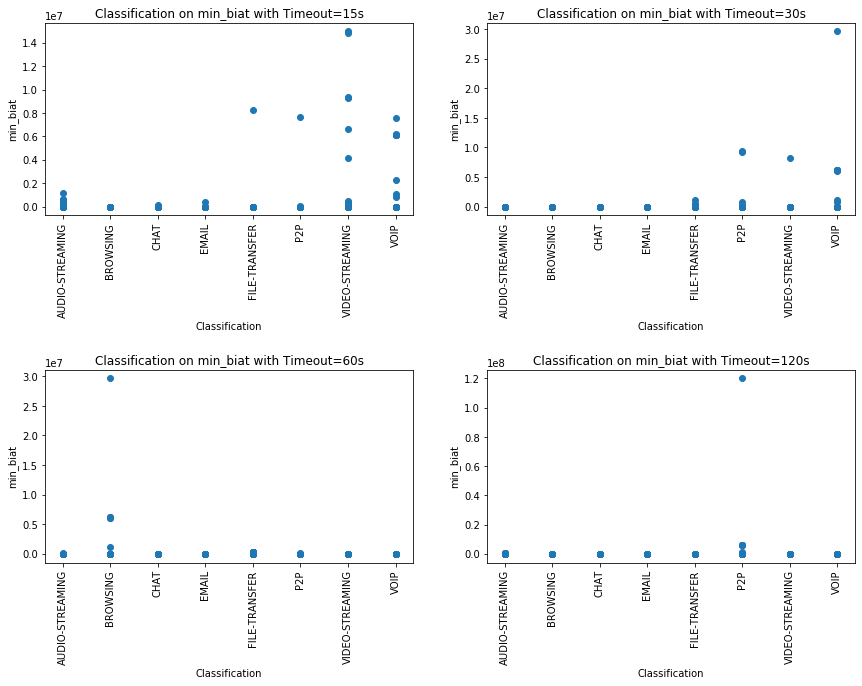

Feature: max_fiat


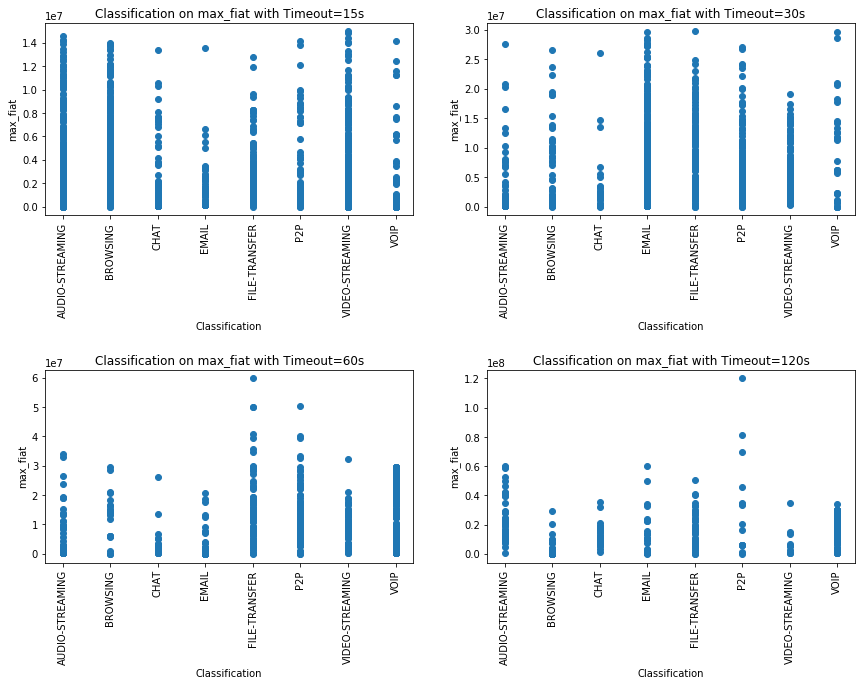

Feature: max_biat


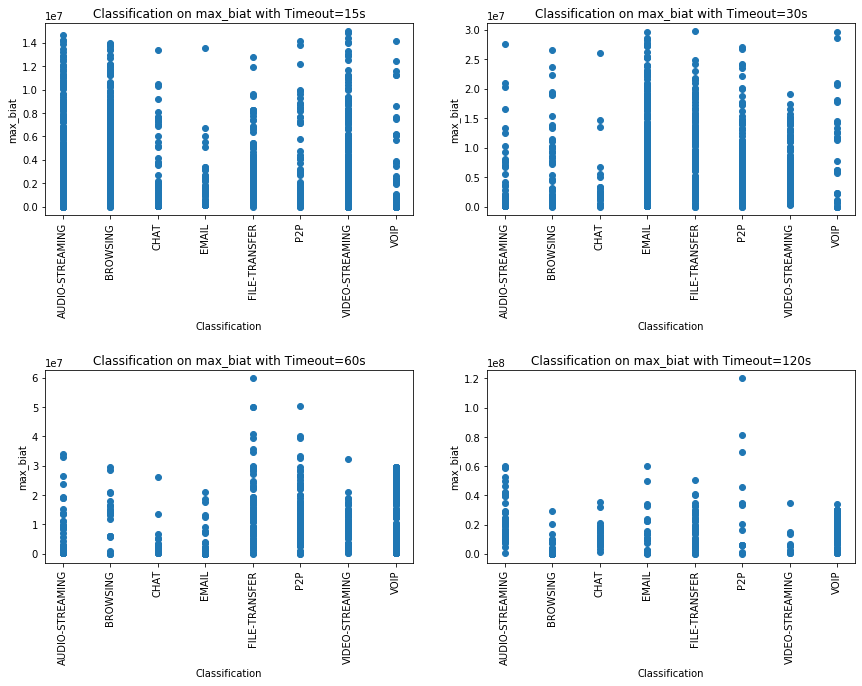

Feature: mean_fiat


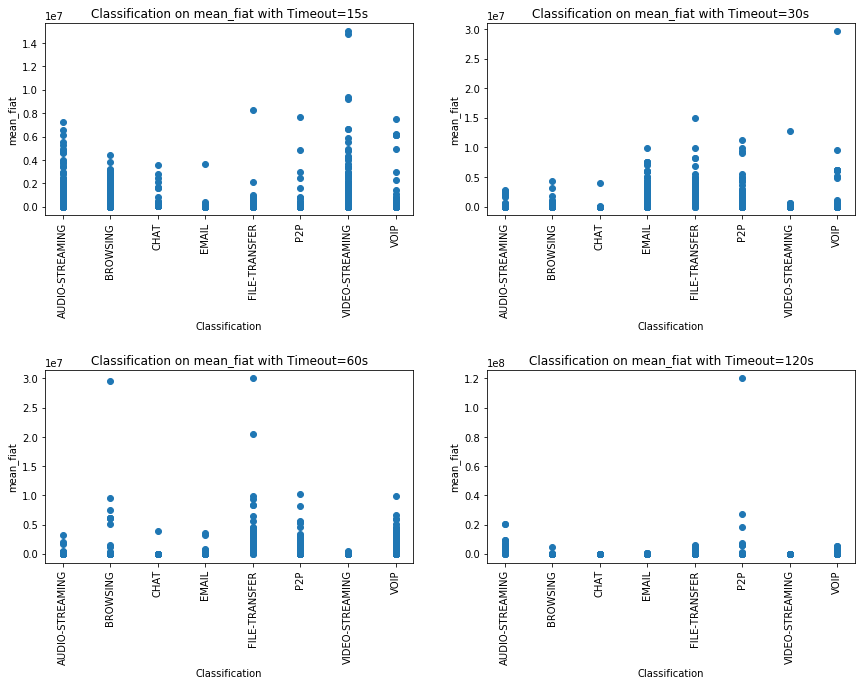

Feature: mean_biat


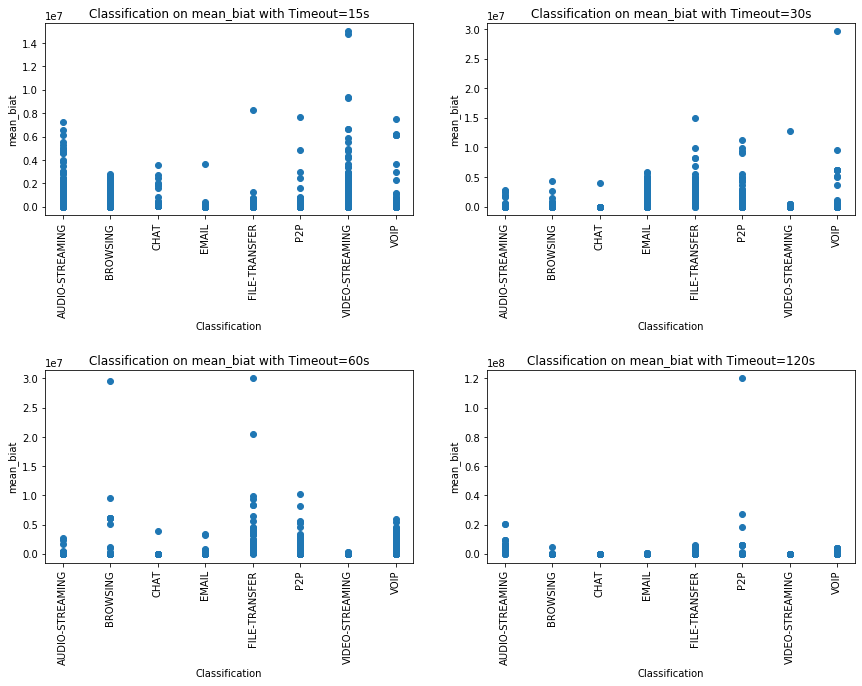

Feature: flowPktsPerSecond


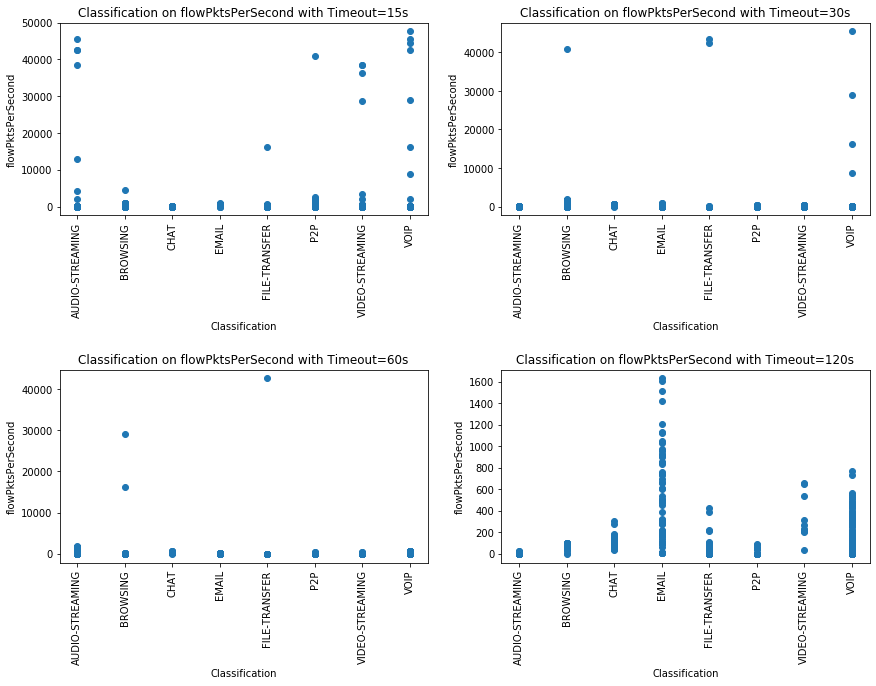

Feature: flowBytesPerSecond


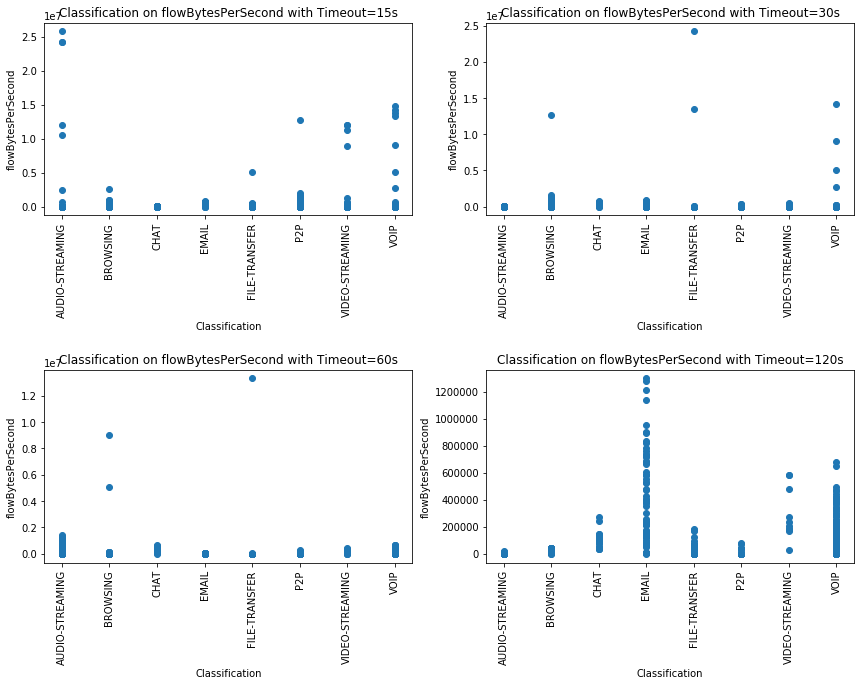

Feature: min_flowiat


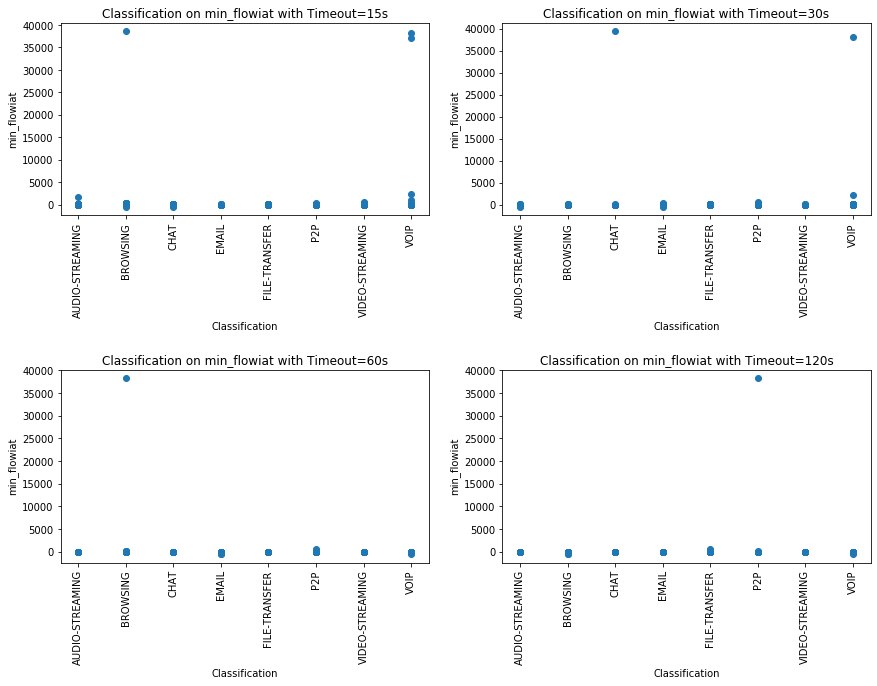

Feature: max_flowiat


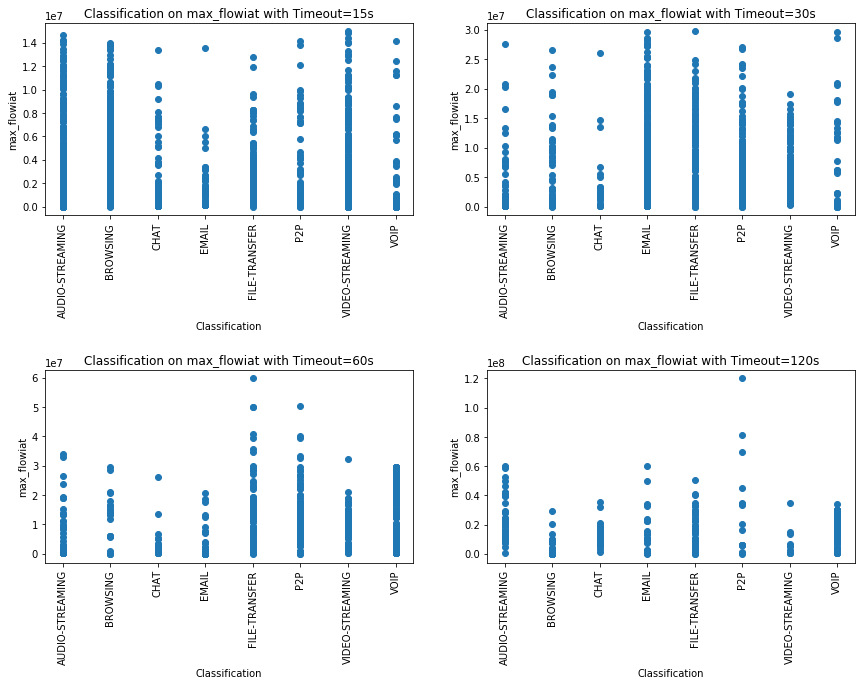

Feature: mean_flowiat


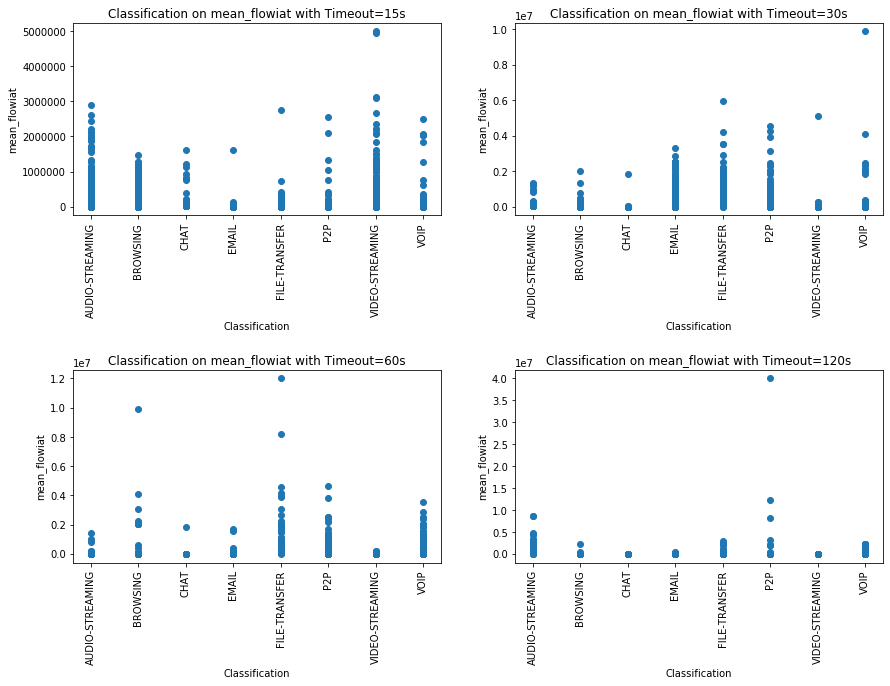

Feature: std_flowiat


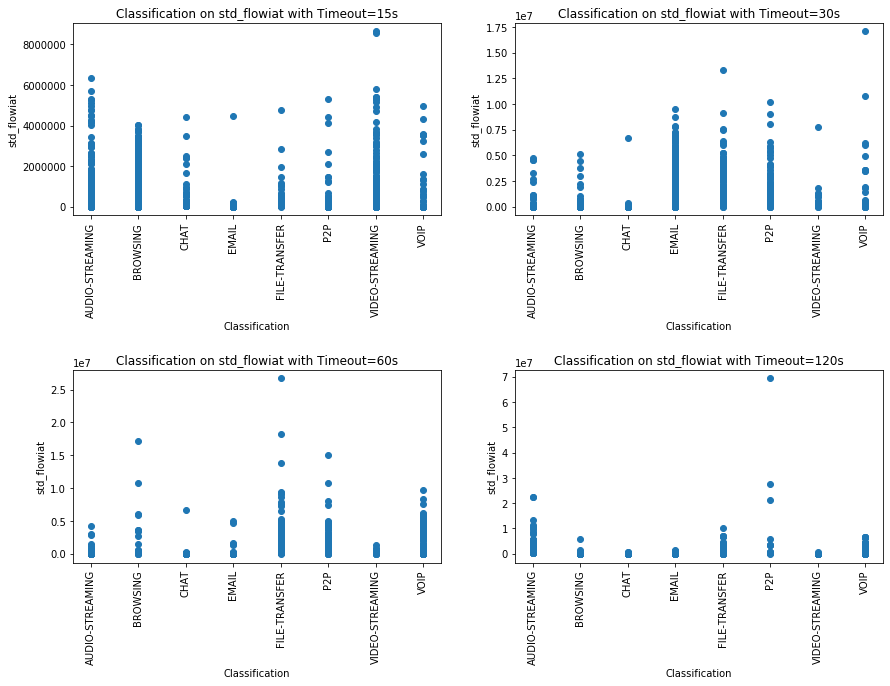

Feature: min_active


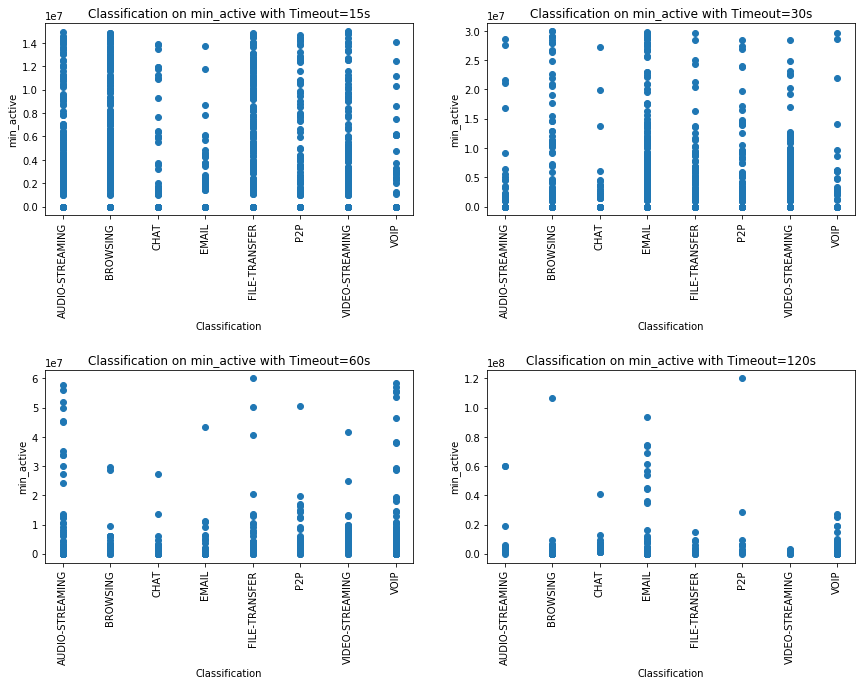

Feature: mean_active


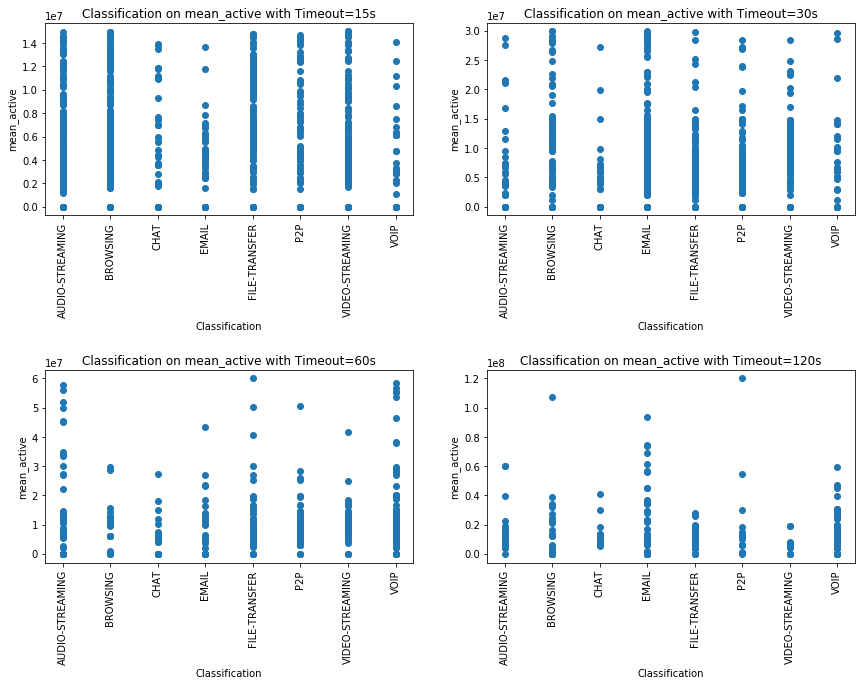

Feature: max_active


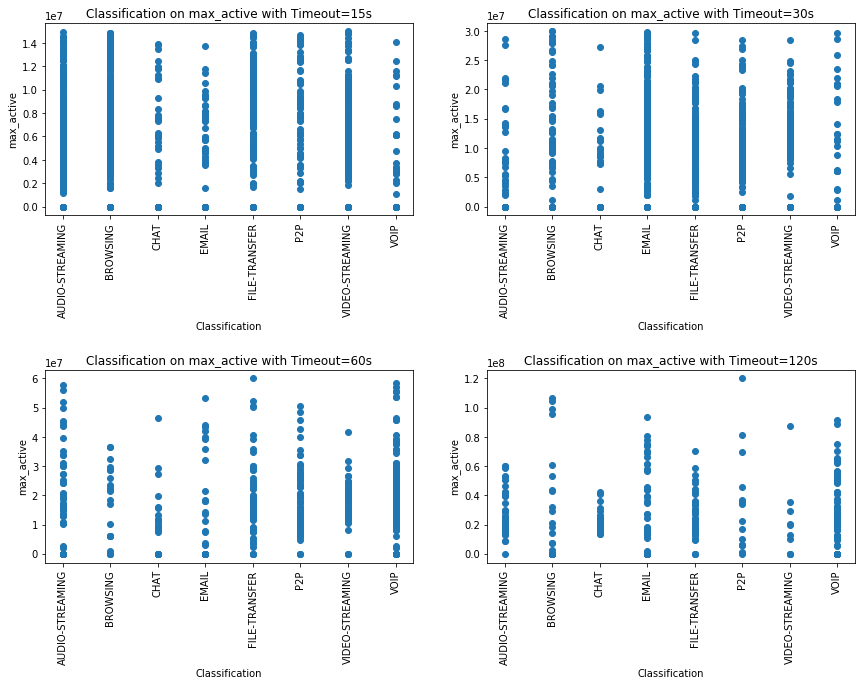

Feature: std_active


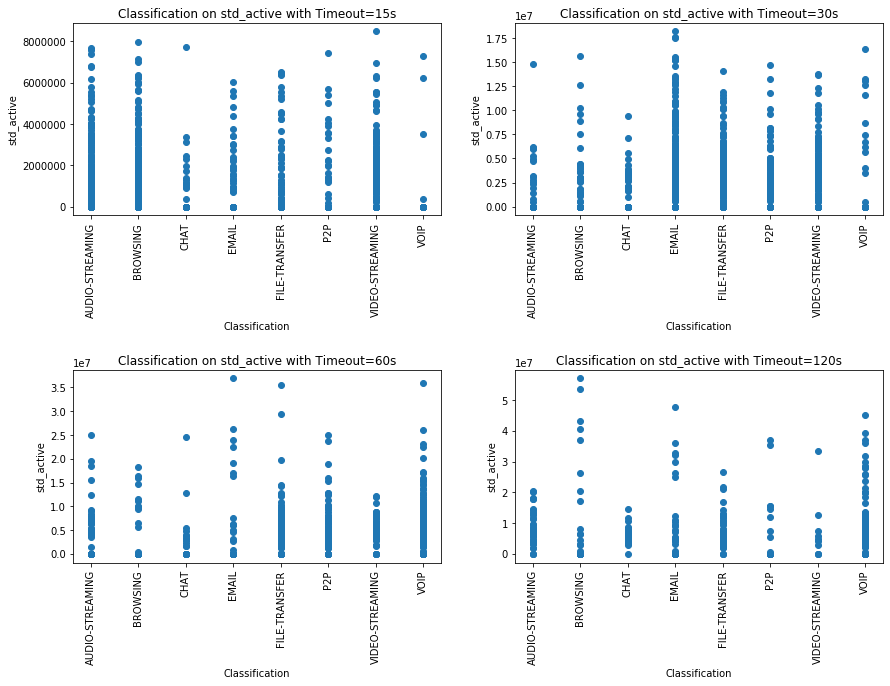

Feature: min_idle


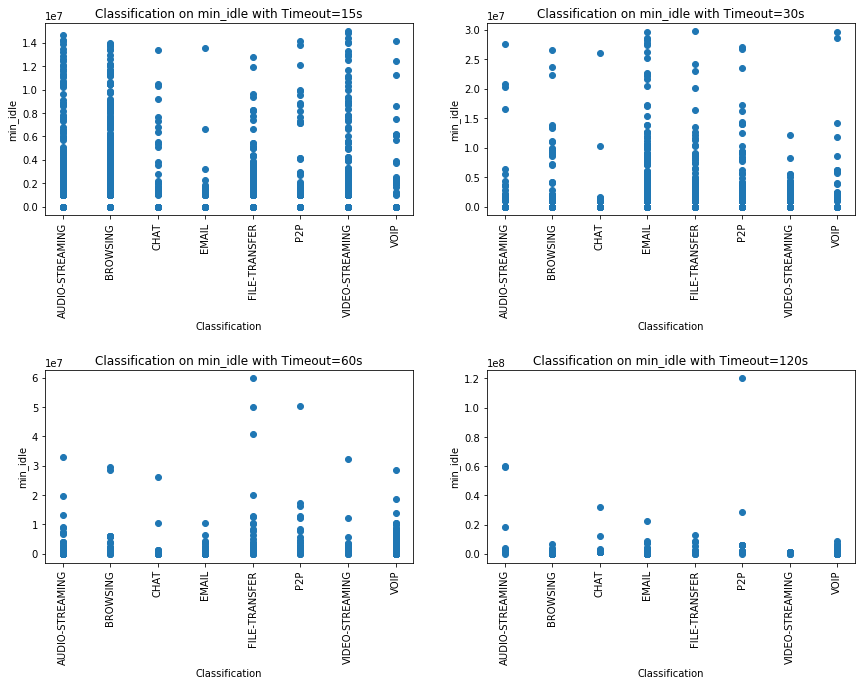

Feature: mean_idle


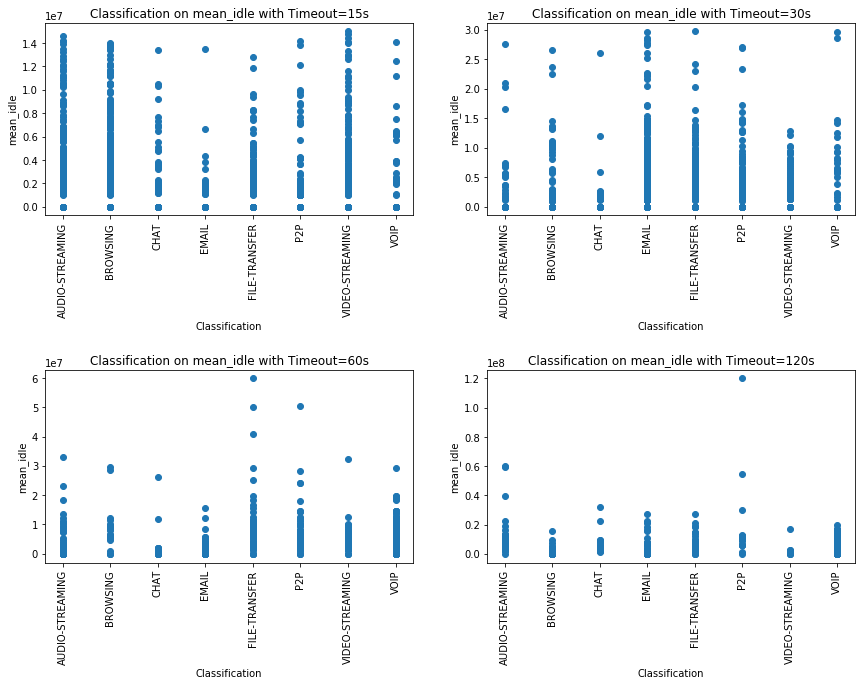

Feature: max_idle


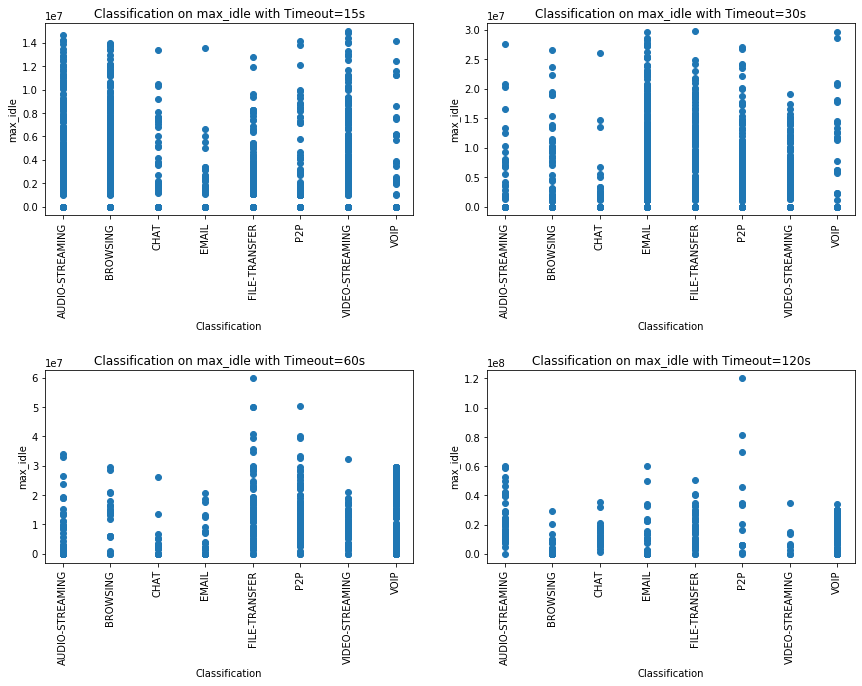

Feature: std_idle


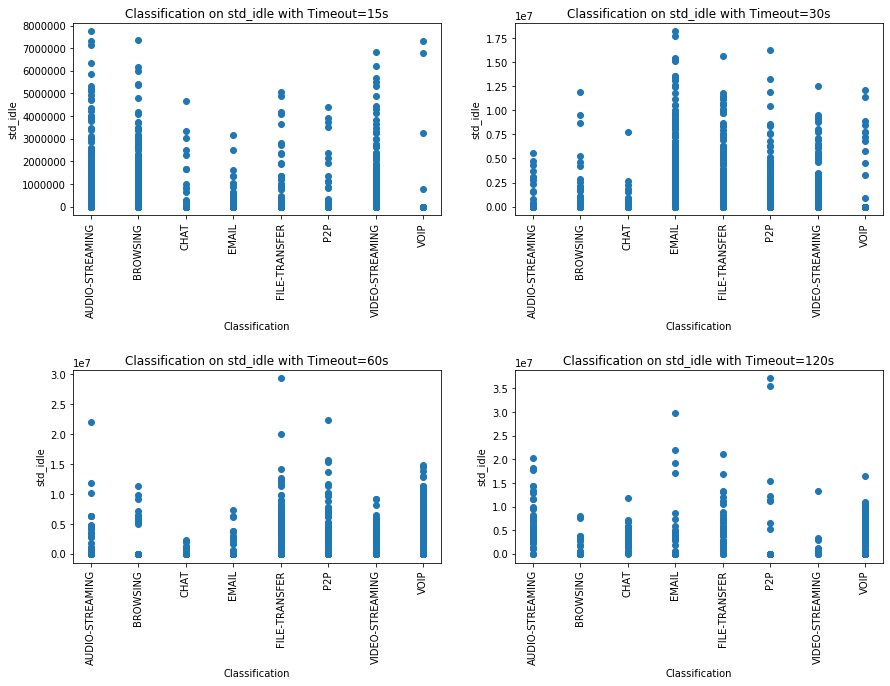

In [7]:
features = dictionary.keys()

for feature in features:
    print('Feature: {}'.format(feature))
    show_scatter_compare(dfs=[df15, df30, df60, df120], feature=feature, timeouts=['15', '30', '60','120'])

Feature: duration


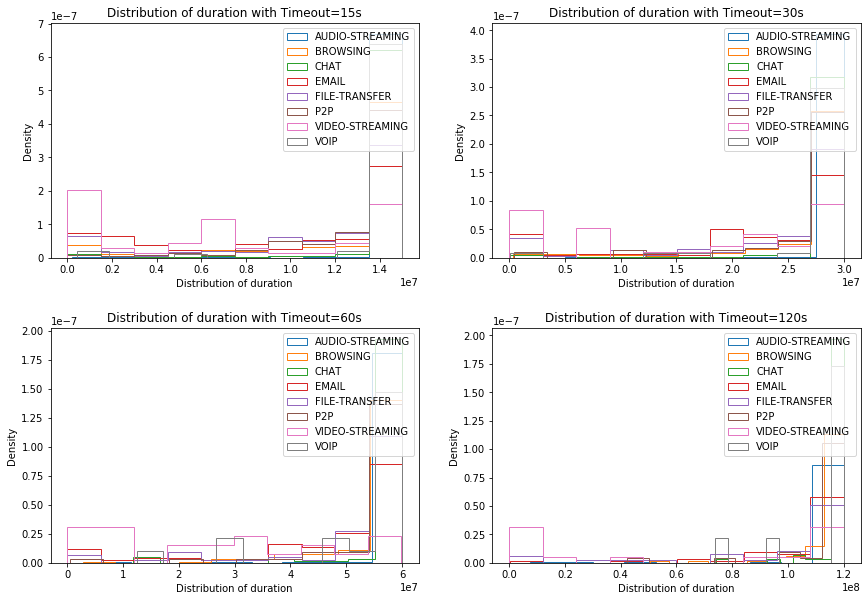

Feature: total_fiat


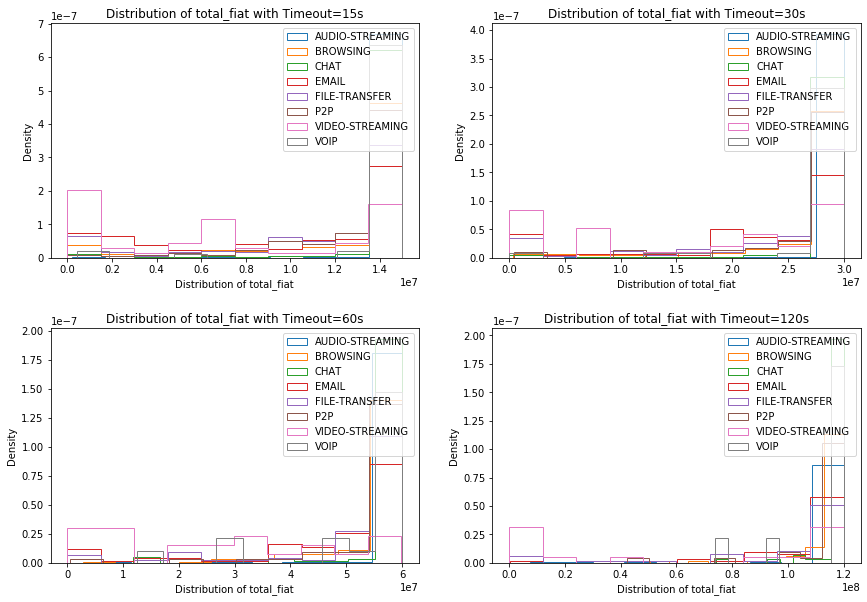

Feature: total_biat


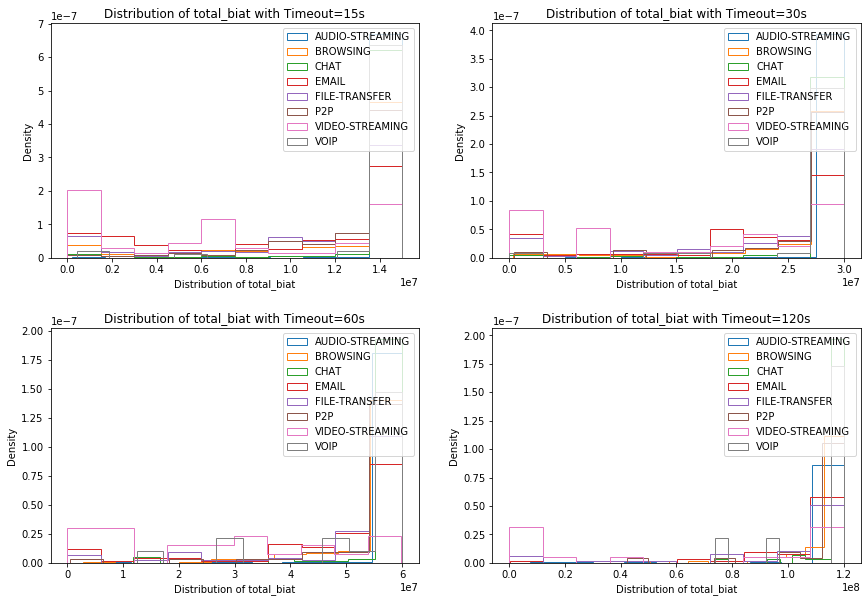

Feature: min_fiat


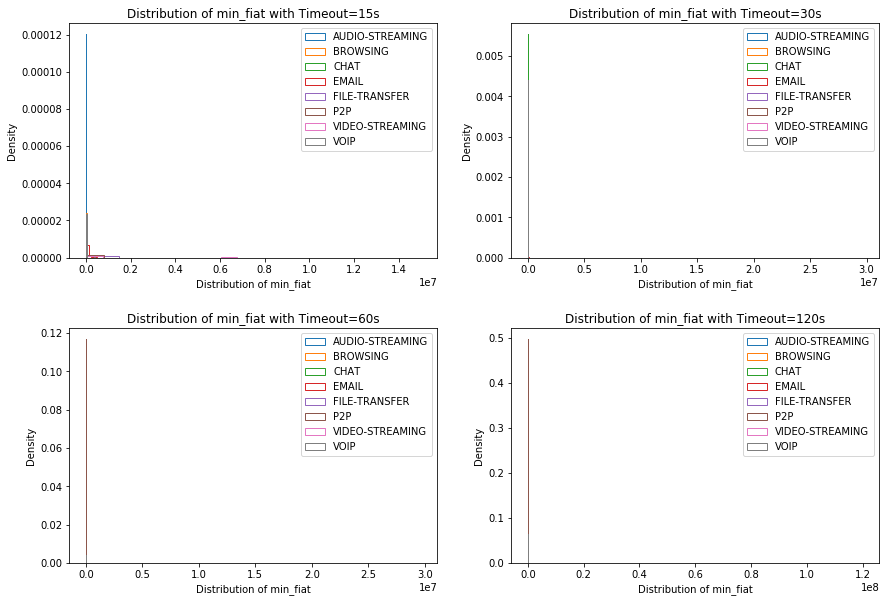

Feature: min_biat


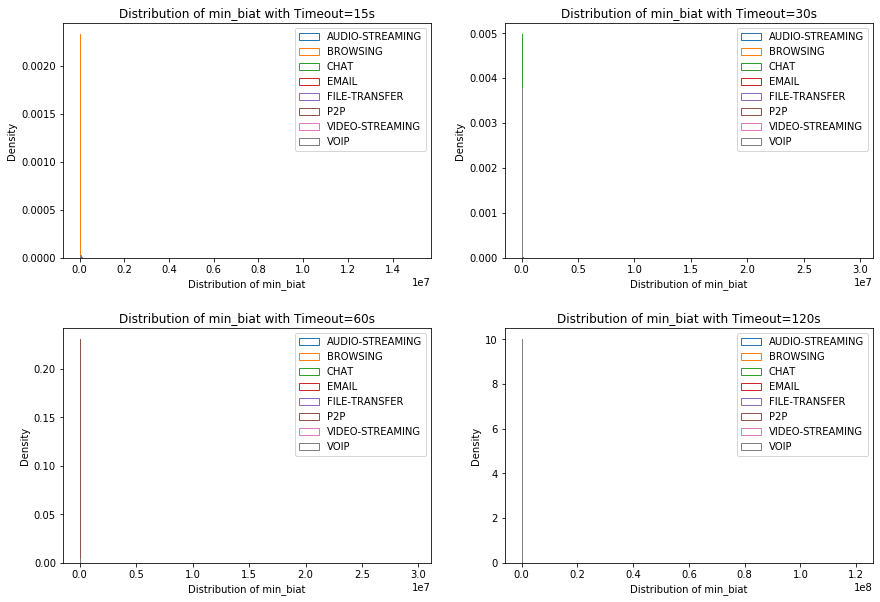

Feature: max_fiat


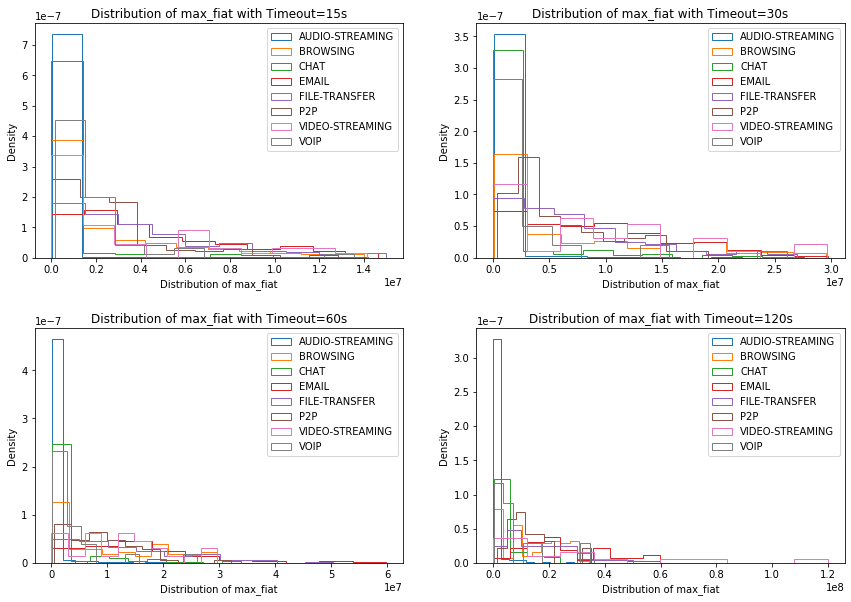

Feature: max_biat


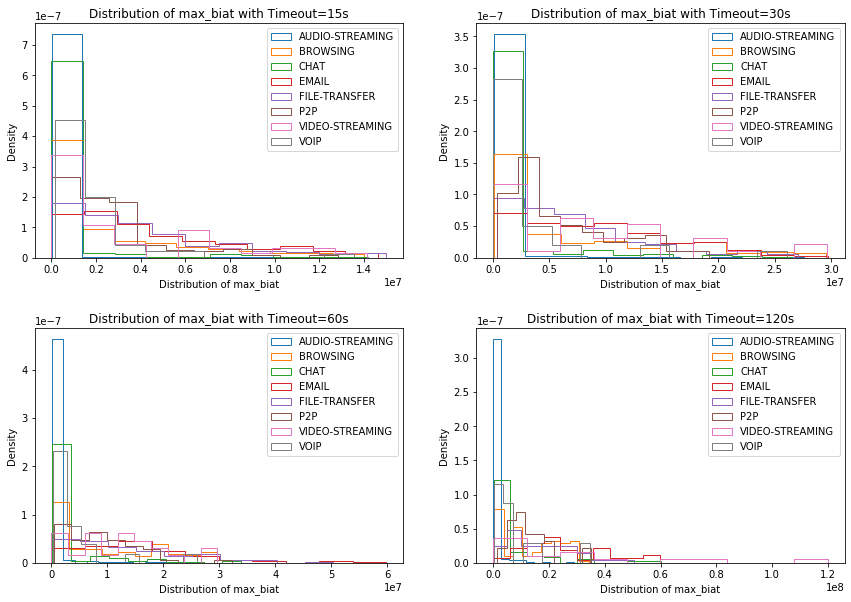

Feature: mean_fiat


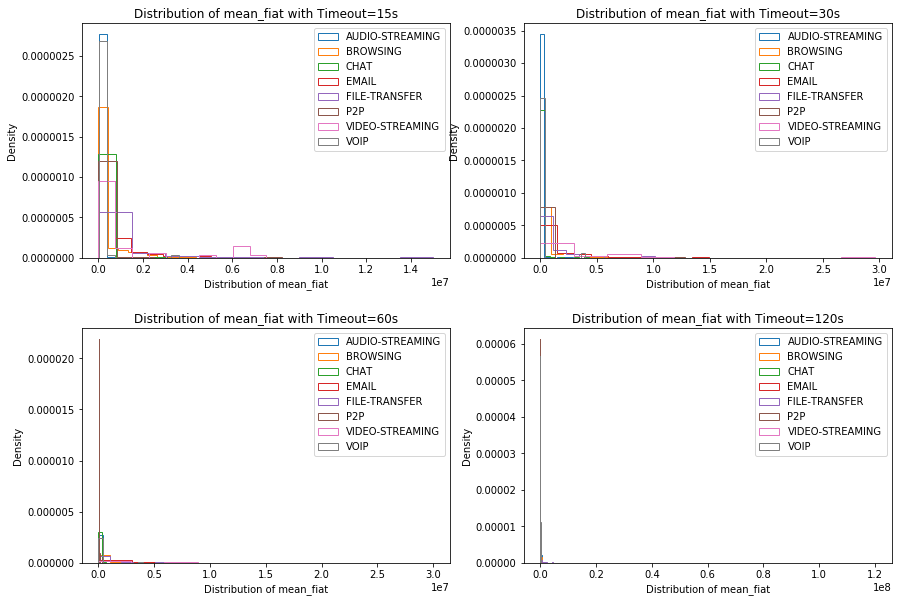

Feature: mean_biat


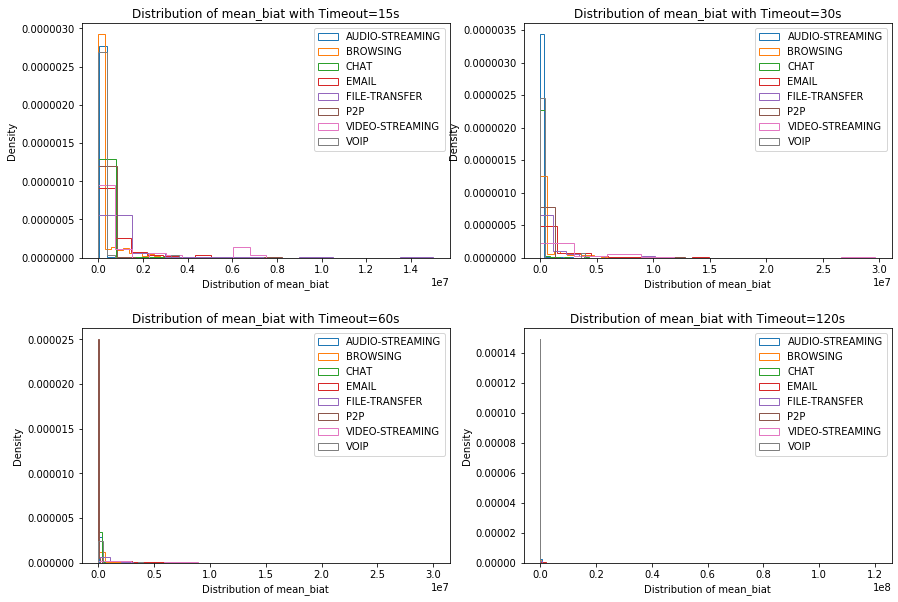

Feature: flowPktsPerSecond


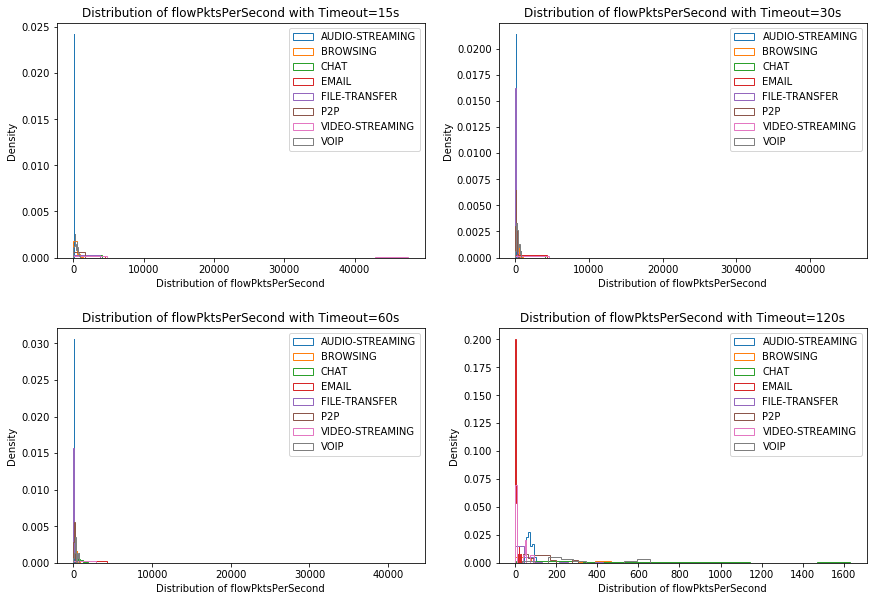

Feature: flowBytesPerSecond


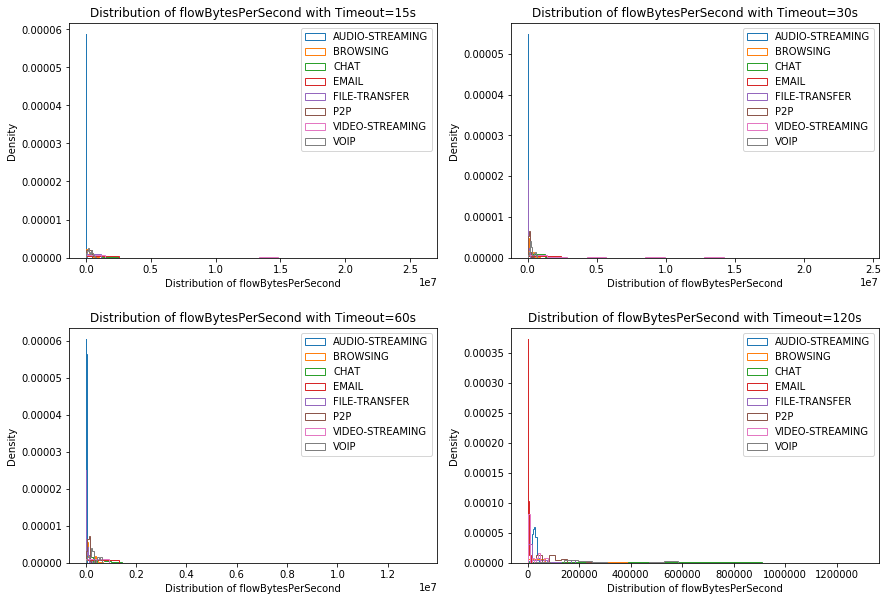

Feature: min_flowiat


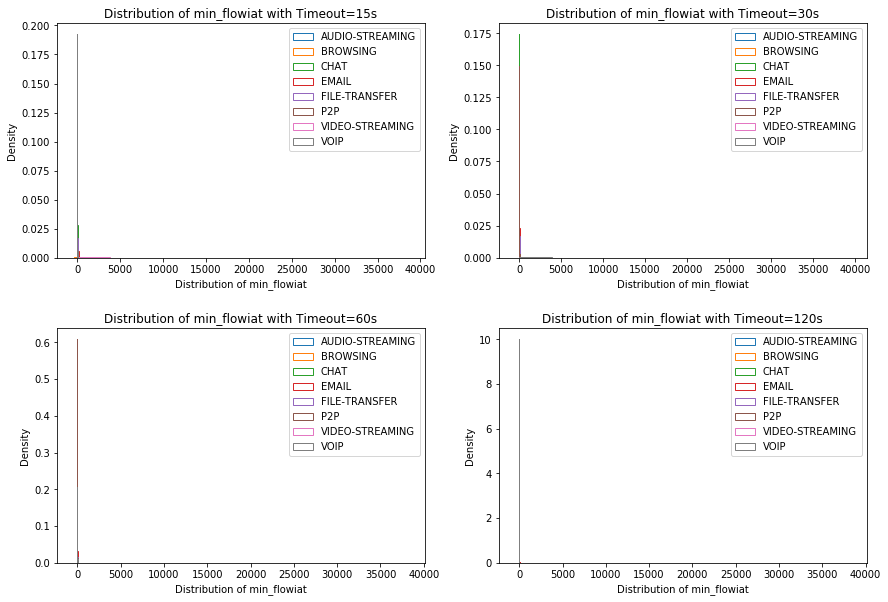

Feature: max_flowiat


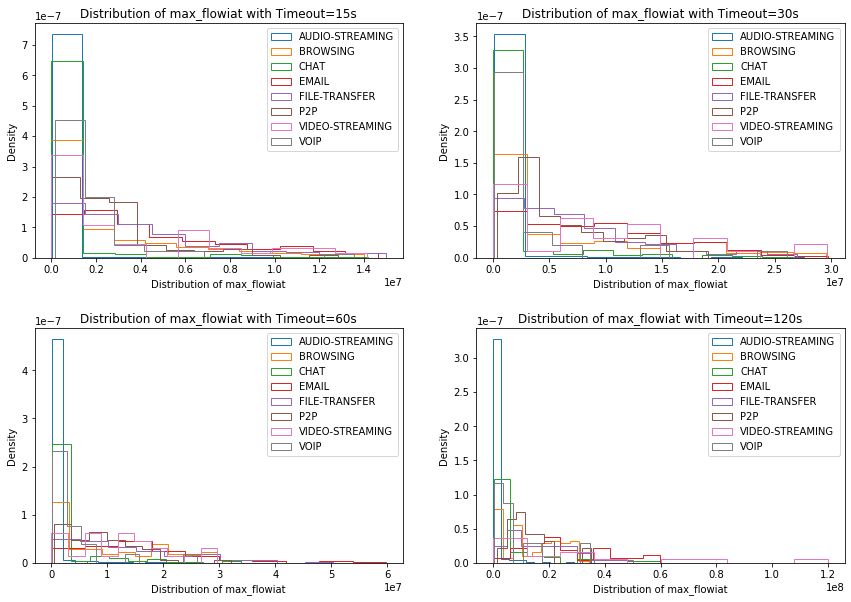

Feature: mean_flowiat


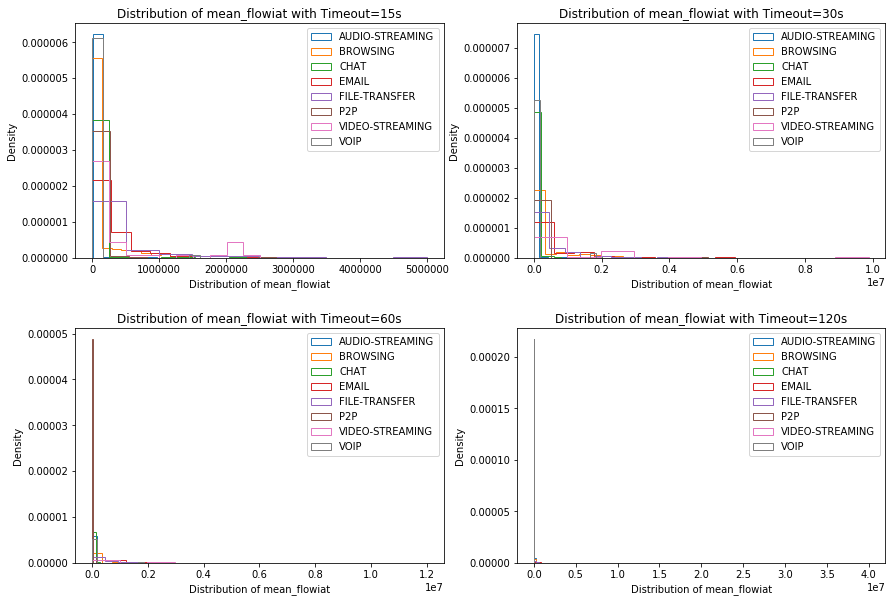

Feature: std_flowiat


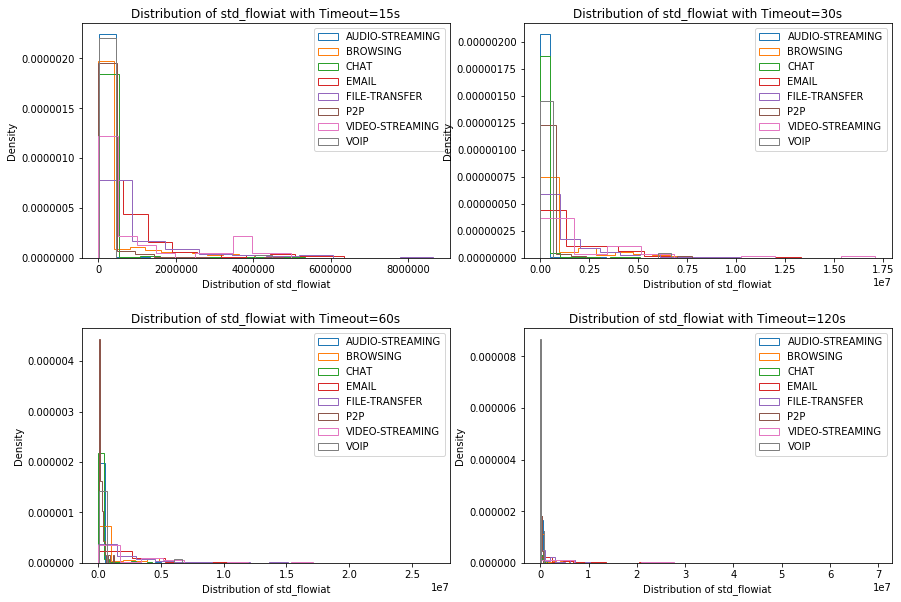

Feature: min_active


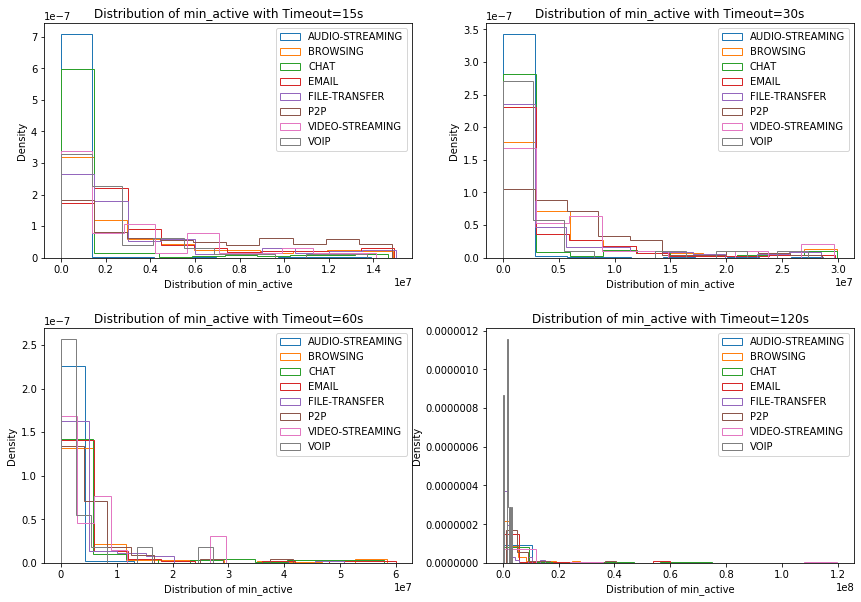

Feature: mean_active


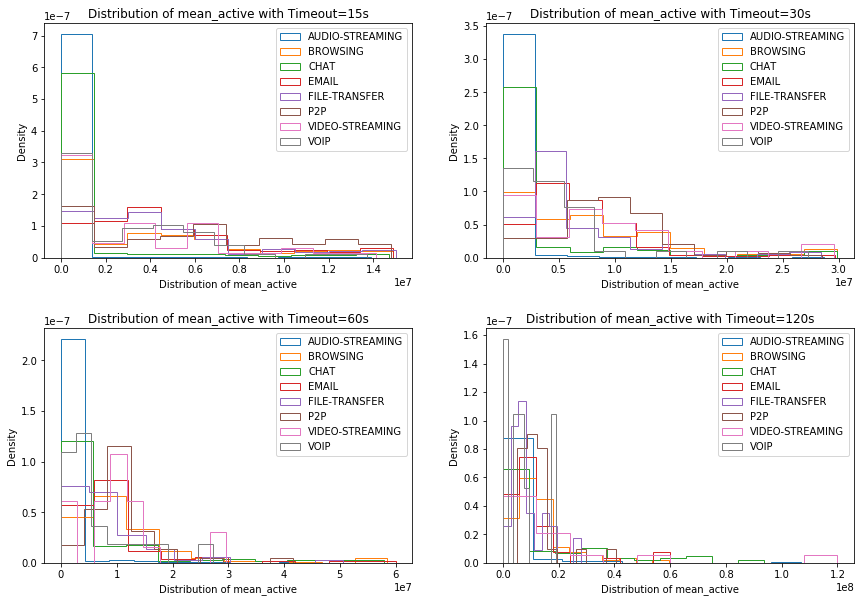

Feature: max_active


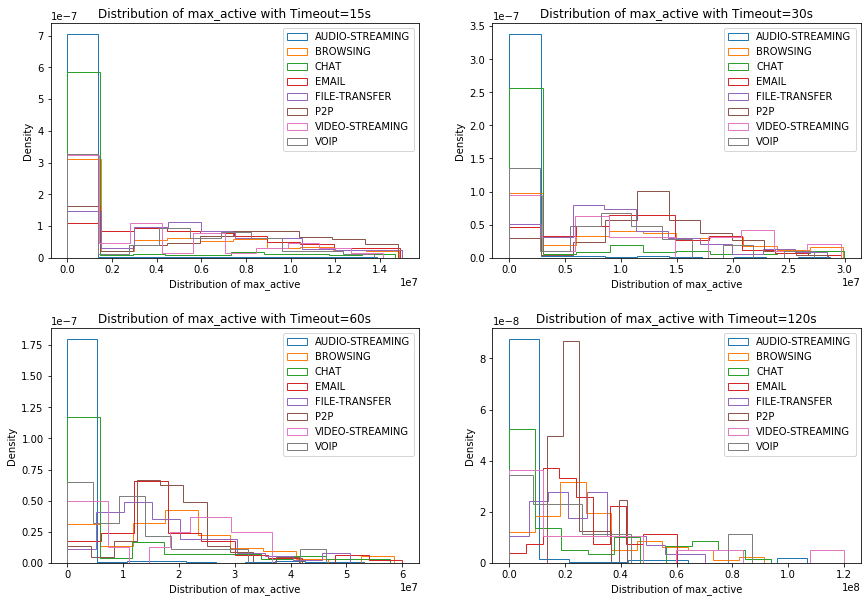

Feature: std_active


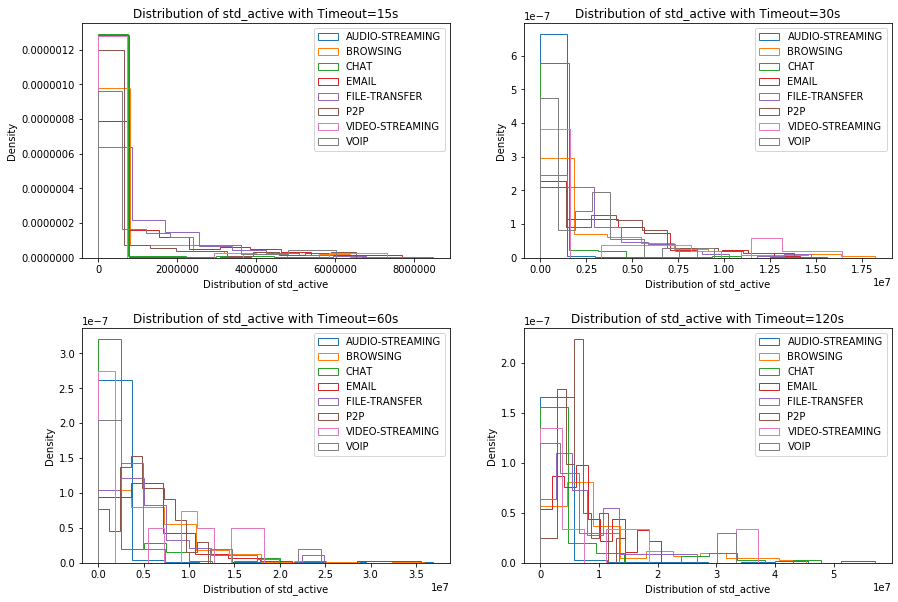

Feature: min_idle


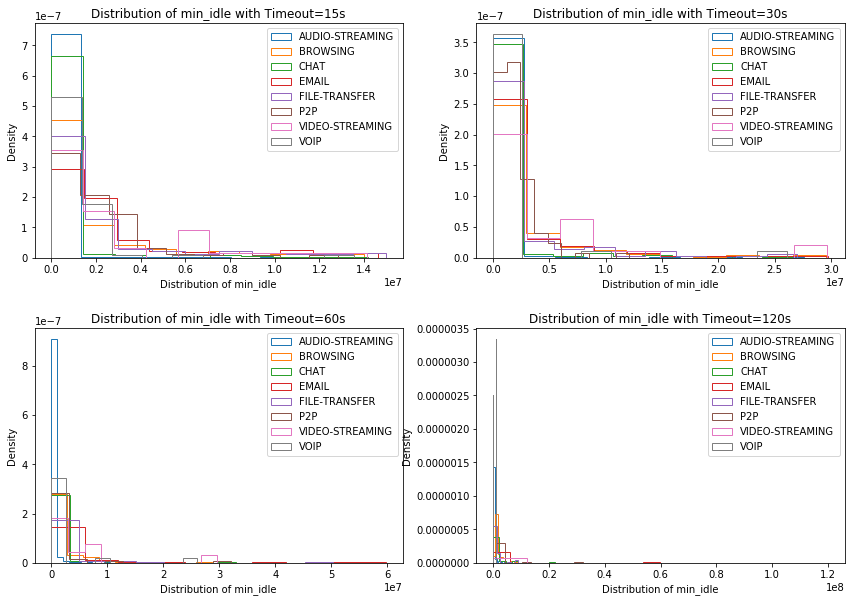

Feature: mean_idle


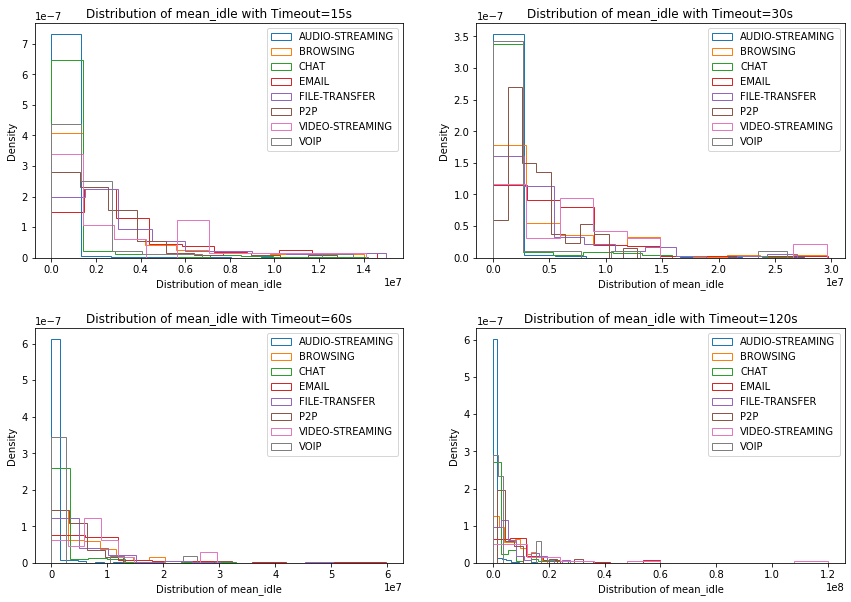

Feature: max_idle


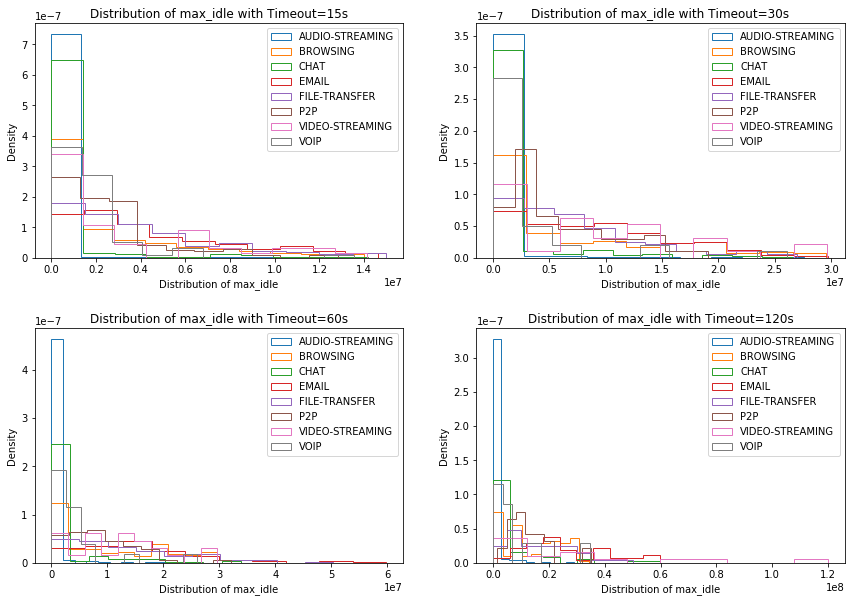

Feature: std_idle


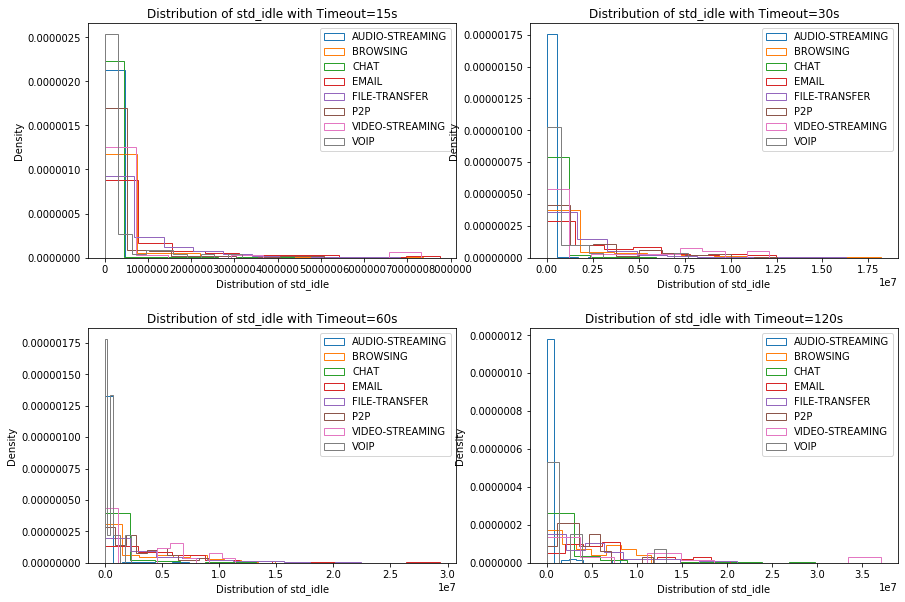

In [8]:
for feature in features:
    print('Feature: {}'.format(feature))
    show_dist_compare(dfs=[df15, df30, df60, df120], feature=feature, timeouts=['15', '30', '60','120'])

So, these graphs are a little difficult to interpret since there is so much information presented. However, let's see what we can get out of these graphs. While many of these graphs show that the eight categories follow trends across all the data categories (Ex. the `max_fiat` feature), there are some features such as `duration` and `total_fiat` that show some separation within the density of the data. Below are a list of all of the features shown that may be useful for the models when classifying the samples.
 - `duration`
 - `total_fiat`
 - `total_biat`
 - `max_biat`
 - `flowBytesPerSecond`
 - `min_active`
 - `mean_active`
 - `max_active`
 - `std_active`
 - `mean_idle`
 - `std_idle`

## To - Do:
 - [x] Compare the feature graphs across timeout values
 - [x] Determine the features that have the clearest distinction between classes
 - [ ] Run Feature Selection algorithms from `sklearn` to determine the most significant features
 
Let's see what the `sklearn`'s feature selection algorithms think of this data.

In [9]:
from sklearn.feature_selection import SelectKBest, SelectFpr, SelectPercentile, f_classif
import math

print('Imports complete.')

Imports complete.


In [10]:
def select_features(df=None, num=10):
    # Technique from https://machinelearningmastery.com/feature-selection-machine-learning-python/
    # feature extraction
    X = df.loc[:, df.columns != dep_var]
    #print(X.head())

    y = df[dep_var]
    #print(y.head())

    test = SelectKBest(score_func=f_classif, k=num)
    fit = test.fit(X, y)

    dictt = []
    i=0
    for col in X.columns:
        score = fit.scores_[i]
        #print(score)
        i+=1
        if not math.isnan(float(score)):
            dictt.append([col, score])    

    dictt.sort(key=lambda arr : float(arr[1]), reverse=True)

    return dictt

In [11]:
voted_features = select_features(df15) + select_features(df30) + select_features(df60) + select_features(df120)
                                          
dictionary = {}
for f in voted_features:
    # f[0] => feature name
    # f[1] => value of feature
    if f[0] in dictionary:
        dictionary[f[0]] += f[1]
    else:
        dictionary[f[0]] = f[1]
        
dictionary = [ [key, dictionary[key]] for key in dictionary.keys() ]

dictionary.sort(key=lambda arr : float(arr[1]), reverse=True)

print('\tFeature\t\tWeight')
i=1
for col, score in dictionary[:10]:
    print('{}\t{}\t{}'.format(i, col, score))
    i+=1

	Feature		Weight
1	max_active	532.5685513780855
2	max_fiat	467.6201110008864
3	max_biat	467.40157667485926
4	max_flowiat	467.3992421569743
5	max_idle	457.09791966352327
6	mean_active	386.4346985309697
7	mean_idle	324.0333139755996
8	duration	312.67895795033417
9	total_biat	312.562706197402
10	total_fiat	312.5097252039715


Above are the features that the algorithm selected as the most significant features when determining the classification of a given sample!

## To - Do:
 - [x] Compare the feature graphs across timeout values
 - [x] Determine the features that have the clearest distinction between classes
 - [x] Run Feature Selection algorithms from `sklearn` to determine the most significant features
 

# Violin Plots!
These will show all of the data we want in a single graph!

In [12]:
#data = pd.DataFrame(df15['total_fiat'], df30['total_fiat'], df120['total_fiat'])

data = pd.DataFrame()
#data['15s'] = df15['total_fiat']
#data['30s'] = df30['total_fiat']
#data['120s'] = df120['total_fiat']
cols_to_keep = ['duration', 'class']

datam1 = df10.loc[:, cols_to_keep]
datam1['timeout'] = '10s'
print(datam1.head())

data0 = df15.loc[:, cols_to_keep]
data0['timeout'] = '15s'
print(data0.head())

data1 = df30.loc[:, cols_to_keep]
data1['timeout'] = '30s'
print(data1.head())

data2 = df60.loc[:, cols_to_keep]
data2['timeout'] = '60s'
print(data2.head())

data3 = df120.loc[:, cols_to_keep]
data3['timeout'] = '120s'
print(data3.head())

data = data0.append([datam1, data0, data1, data2, data3])
data['timeout'].value_counts()

   duration            class timeout
0   7248168  AUDIO-STREAMING     10s
1   5157723  AUDIO-STREAMING     10s
2        41  AUDIO-STREAMING     10s
3   9543565  AUDIO-STREAMING     10s
4   9987537  AUDIO-STREAMING     10s
   duration            class timeout
0  10345300             CHAT     15s
1  14966353  VIDEO-STREAMING     15s
2    272867             CHAT     15s
3  14999391  VIDEO-STREAMING     15s
4   7190597             CHAT     15s
   duration class timeout
0  14812814  VOIP     30s
1  17311357  VOIP     30s
2  22086164  VOIP     30s
3  29779605  VOIP     30s
4  20594081  VOIP     30s
   duration          class timeout
0  59990337  FILE-TRANSFER     60s
1  59977810  FILE-TRANSFER     60s
2  59973902  FILE-TRANSFER     60s
3  59990105  FILE-TRANSFER     60s
4  59972926  FILE-TRANSFER     60s
    duration class timeout
0  116516054  CHAT    120s
1  110542890  CHAT    120s
2  101111380  CHAT    120s
3  115531998  CHAT    120s
4   88160003  CHAT    120s


10s     8044
15s     6720
30s     1803
60s      936
120s     486
Name: timeout, dtype: int64

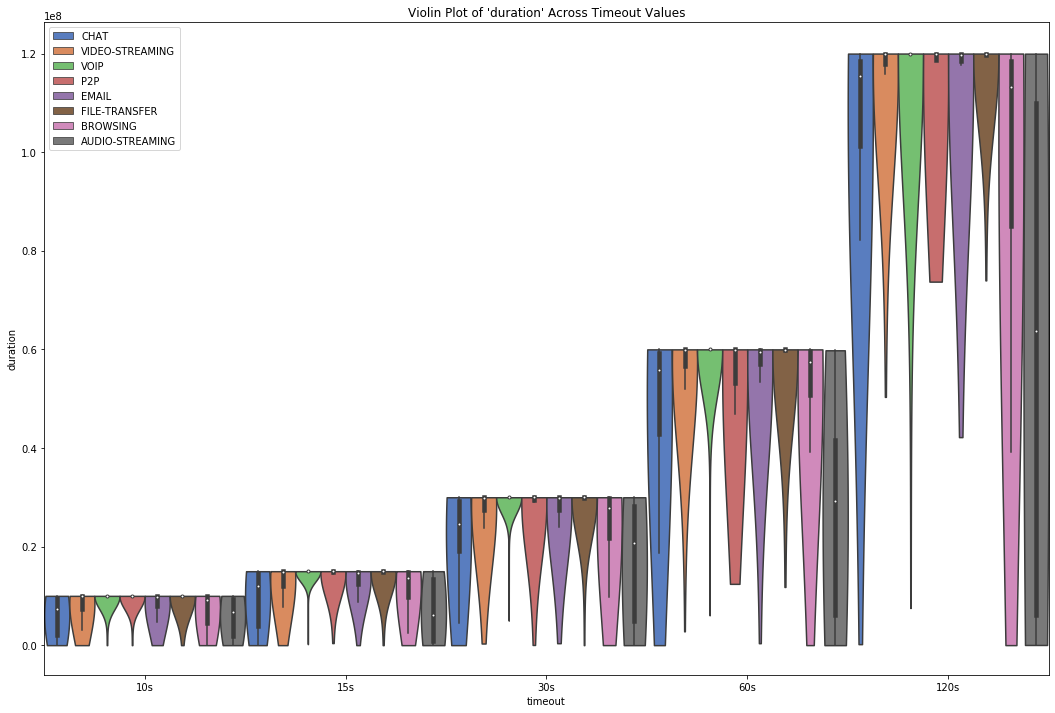

In [13]:
fig = plt.figure()
fig.set_size_inches(18, 12)

sns.violinplot(x='timeout', y='duration', data=data, order=['10s', '15s', '30s', '60s', '120s'], scale='width', width=1.0, hue='class', palette='muted', cut=0, scale_hue=True, bw=2.0)

plt.legend(loc='upper left')
plt.title('Violin Plot of \'duration\' Across Timeout Values')
plt.show()

In [14]:
def get_df(feature, dep_var):
    data = pd.DataFrame()
    order = []
    
    if isinstance(feature, (list,)):
        print('List!')
        
        for f in feature:
            cols_to_keep = [f, dep_var]

            if f in df10.columns:
                data0 = df10.loc[:, cols_to_keep]
                data0['timeout'] = '10s'
                data0['feature'] = f
                data = data.append([data0])
                order.append('10s')
            else:
                print('Feature {} not present in 10s'.format(f))

            if f in df15.columns:
                data0 = df15.loc[:, cols_to_keep]
                data0['timeout'] = '15s'
                data0['feature'] = f
                data = data.append([data0])
                order.append('15s')
            else:
                print('Feature {} not present in 15s'.format(f))

            if f in df30.columns:
                data0 = df30.loc[:, cols_to_keep]
                data0['timeout'] = '30s'
                data0['feature'] = f
                data = data.append([data0])
                order.append('30s')
            else:
                print('Feature {} not present in 30s'.format(f))

            if f in df60.columns:
                data0 = df60.loc[:, cols_to_keep]
                data0['timeout'] = '60s'
                data0['feature'] = f
                data = data.append([data0])
                order.append('60s')
            else:
                print('Feature {} not present in 60s'.format(f))

            if f in df120.columns:
                data0 = df120.loc[:, cols_to_keep]
                data0['timeout'] = '120s'
                data0['feature'] = f
                data = data.append([data0])
                order.append('120s')
            else:
                print('Feature {} not present in 120s'.format(f))
            
            #print('reached')
    else:
        cols_to_keep = [feature, dep_var]

        if feature in df10.columns:
            data0 = df10.loc[:, cols_to_keep]
            data0['timeout'] = '10s'
            data = data.append([data0])
            order.append('10s')
        else:
            print('Feature {} not present in 10s'.format(feature))

        if feature in df15.columns:
            data0 = df15.loc[:, cols_to_keep]
            data0['timeout'] = '15s'
            data = data.append([data0])
            order.append('15s')
        else:
            print('Feature {} not present in 15s'.format(feature))

        if feature in df30.columns:
            data0 = df30.loc[:, cols_to_keep]
            data0['timeout'] = '30s'
            data = data.append([data0])
            order.append('30s')
        else:
            print('Feature {} not present in 30s'.format(feature))

        if feature in df60.columns:
            data0 = df60.loc[:, cols_to_keep]
            data0['timeout'] = '60s'
            data = data.append([data0])
            order.append('60s')
        else:
            print('Feature {} not present in 60s'.format(feature))

        if feature in df120.columns:
            data0 = df120.loc[:, cols_to_keep]
            data0['timeout'] = '120s'
            data = data.append([data0])
            order.append('120s')
        else:
            print('Feature {} not present in 120s'.format(feature))
    #print(data.head())
    return [data, order]

flowBytesPerSecond


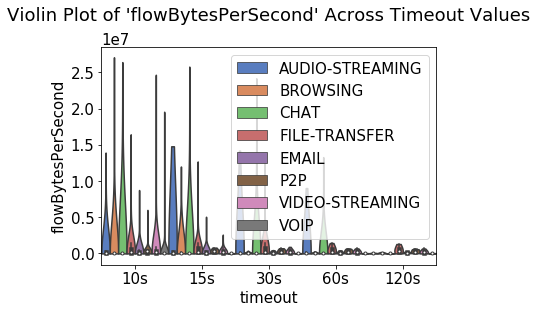

In [15]:
for feature in features:
    feature='flowBytesPerSecond'
    print(feature)
    
    data, order = get_df(feature=feature, dep_var='class')
    
    fig = plt.figure()
    fig.set_size_inches(6,4)
    plt.rcParams.update({'font.size':15})

    sns.violinplot(x='timeout', y=feature, data=data, order=order, scale='width', width=1.0, hue='class', palette='muted', cut=0, scale_hue=True, bw=2.0)

    plt.legend(loc='upper right')
    plt.title('Violin Plot of \'{}\' Across Timeout Values\n'.format(feature))
    
    plt.show()
    break

feature: mean_fiat (0, 0)
feature: min_flowiat (0, 1)
feature: max_flowiat (0, 2)
feature: mean_flowiat (1, 0)
feature: flowBytesPerSecond (1, 1)
feature: duration (1, 2)


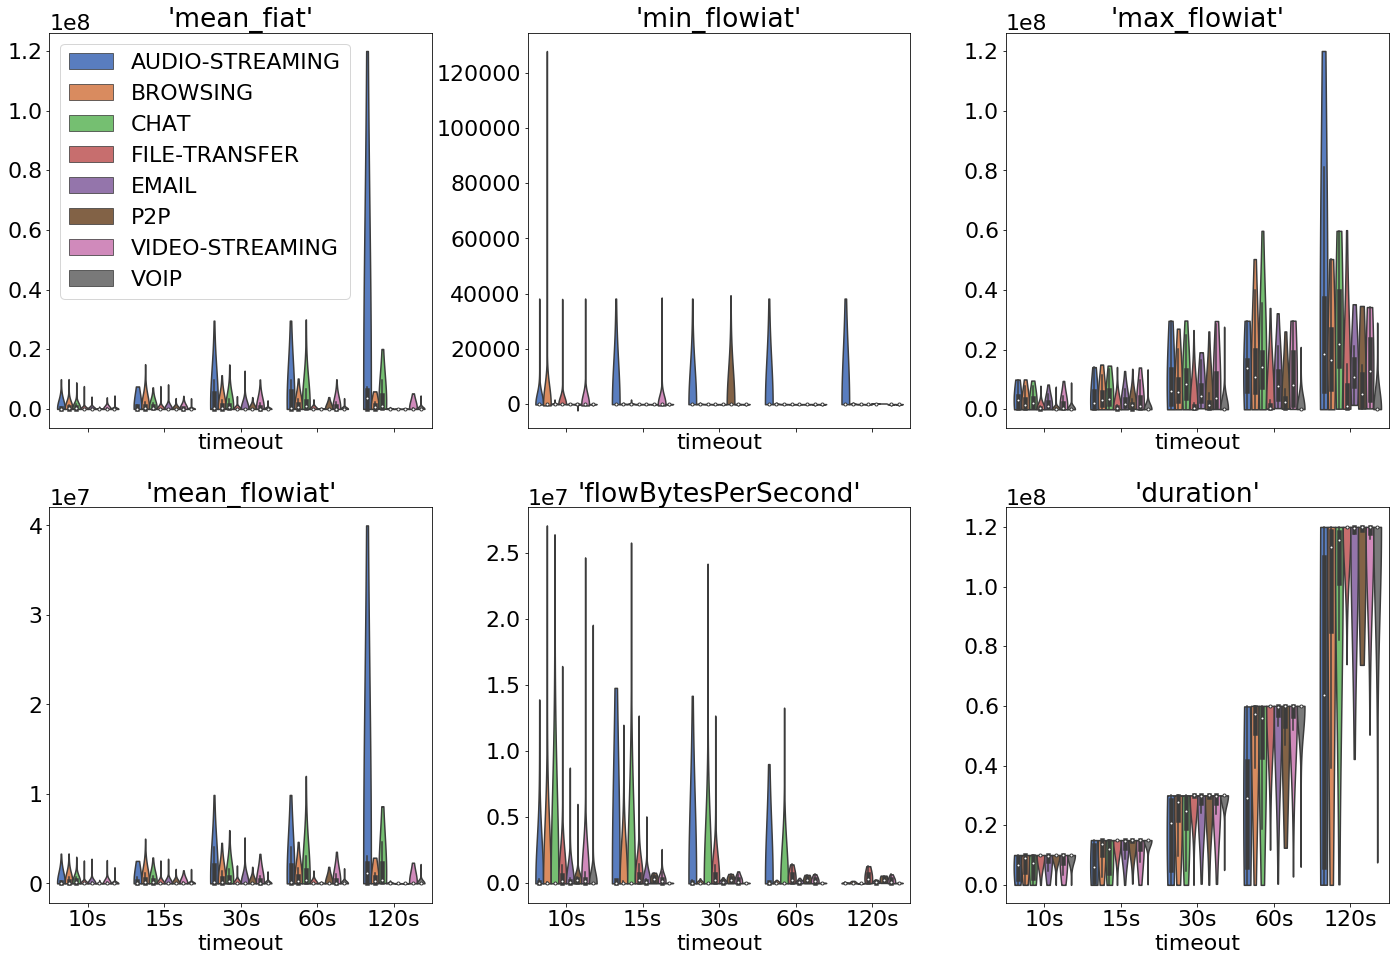

In [19]:
nrows=2
ncols=3
fig,axes= plt.subplots(nrows=nrows, ncols=ncols, sharex='col')
fig.set_size_inches(24,16)
plt.rcParams.update({'font.size':22})
feature_list = ['duration', 'flowBytesPerSecond', 'mean_flowiat', 'max_flowiat', 'min_flowiat', 'mean_fiat']

legend=False

for i in range(nrows):
    for j in range(ncols):
        feature = feature_list.pop()
        print('feature: {} ({}, {})'.format(feature, i, j))
        
        axes[i][j].ticklabel_format(style='sci', axis='y')
        
        data, order = get_df(feature=feature, dep_var='class')
        sns.violinplot(x='timeout', y=feature, data=data, order=order, scale='width', hue='class', palette='muted', cut=0, scale_hue=True, bw=2.0, ax=axes[i][j])

        if legend:      
            axes[i][j].get_legend().remove()
        else:
            axes[i][j].legend(loc='upper left')
            legend=True
        axes[i][j].set_title('\'{}\''.format(feature))
        axes[i][j].set_ylabel('')
        
plt.subplots_adjust(wspace=0.25)
#fig.tight_layout()
plt.show() 